In [1]:
import os
import numpy as np
import pandas as pd
import arcpy
from arcgis.features import GeoAccessor, GeoSeriesAccessor
arcpy.env.overwriteOutput = True

# show all columns
pd.options.display.max_columns = None

# pd.DataFrame.spatial.from_featureclass(???)
# df.spatial.to_featureclass(location=???,sanitize_columns=False)

In [2]:
# create output gdb
outputs = '.\\Outputs'
gdb = os.path.join(outputs, "network2.gdb")
if not arcpy.Exists(gdb):
    arcpy.CreateFileGDB_management(outputs, "network2.gdb")

In [3]:
scenario = pd.DataFrame.spatial.from_featureclass(r"E:\Projects\utah_bike_demand_model\Post_Process_Bike_Model_Outputs\Outputs\network_3900.gdb\links_bv")
base = pd.DataFrame.spatial.from_featureclass(r"E:\Active_Transportation\Scenarios\3900 South\network_base.gdb\links_bv")

In [4]:
base.columns

Index(['OBJECTID', 'fid', 'id', 'link_id', 'temp_id', 'from_node', 'to_node',
       'from_x', 'from_y', 'to_x', 'to_y', 'name', 'oneway', 'speed',
       'drive_time', 'bike_time', 'pedestrian', 'len_miles', 'connector_n',
       'carto_code', 'aadt', 'len_meters', 'signal', 'sig_count', 'bike_lane',
       'bike_path', 'bike_blvd', 'from_z', 'to_z', 'slope_ab', 'slope_ba',
       'slope_per', 'key', 'total_bvol', 'ft_bvol', 'tf_bvol', 'SHAPE'],
      dtype='object')

In [5]:
# subset columns
columns = ['link_id','ft_bvol','tf_bvol','total_bvol','slope_ab','slope_ba','slope_per','SHAPE']
base = base[columns].copy()
scenario = scenario[columns].copy()

# update column names for scenario
scenario_name = '_3900S'
new_columns = [(lambda col: col + scenario_name if col != 'SHAPE' else col) (col) for col in columns]
scenario.columns = new_columns

# export formatted tables
base.spatial.to_featureclass(location=os.path.join(gdb, 'base'),sanitize_columns=False)
scenario.spatial.to_featureclass(location=os.path.join(gdb, 'scenario'),sanitize_columns=False)

'E:\\Projects\\utah_bike_demand_model\\Post_Process_Bike_Model_Outputs\\Outputs\\network2.gdb\\scenario'

In [7]:
# summarize address points address_point_count "ap_count"
target_features = base
join_features = scenario
output_features = os.path.join(gdb, "joined")

#spatial join
link_join = arcpy.SpatialJoin_analysis(target_features, join_features, output_features,'JOIN_ONE_TO_ONE', "KEEP_ALL", 
                                       match_option="ARE_IDENTICAL_TO")

link_join_df = pd.DataFrame.spatial.from_featureclass(link_join)

<AxesSubplot:xlabel='total_bvol', ylabel='total_bvol_3900S'>

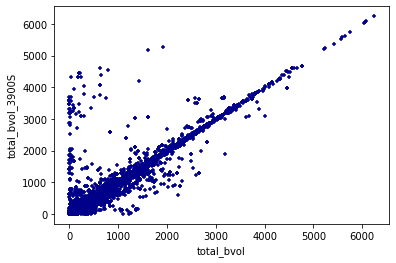

In [8]:
link_join_df.plot.scatter(x='total_bvol', y='total_bvol{}'.format(scenario_name), c='DarkBlue',s=10,marker='+')

<AxesSubplot:xlabel='slope_per', ylabel='slope_per_3900S'>

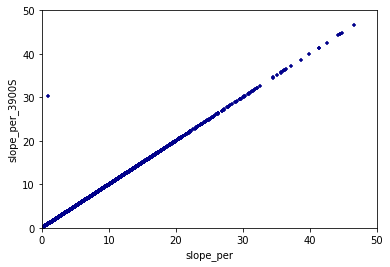

In [9]:
link_join_df.plot.scatter(x='slope_per', y='slope_per{}'.format(scenario_name), c='DarkBlue',s=10,marker='+', ylim=[0,50], xlim=[0,50])

In [10]:
# calculate the diffenrece in volume
link_join_df['total_bvol_DIFF'] = link_join_df['total_bvol{}'.format(scenario_name)] - link_join_df['total_bvol']
link_join_df.spatial.to_featureclass(location=os.path.join(gdb, 'links_diff'),sanitize_columns=False)

'E:\\Projects\\utah_bike_demand_model\\Post_Process_Bike_Model_Outputs\\Outputs\\network2.gdb\\links_diff'